In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

## 1. 법정동 코드 가공

In [3]:
locCode = pd.read_excel('../data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
seoul = locCode[locCode['시도명'] == '서울특별시']
seoul['지역코드']= seoul['법정동코드'].astype(str).str.slice(start=0,stop=5)
seoul = seoul.loc[:,['시군구명','지역코드']]
seoul = seoul.drop_duplicates(['지역코드'], keep='last')
seoul.reset_index(inplace=True)
seoul.drop('index',axis=1,inplace=True)
seoul.drop(0,inplace=True)
seoul['지역코드'] = np.int64(seoul['지역코드'])

C:\lje\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구명    25 non-null     object
 1   지역코드    25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 600.0+ bytes


## 2. 실거래가 데이터 가공

In [6]:
apt = pd.read_csv('../data/2019년 서울 아파트 실거래가.csv', encoding="cp949")
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,"105,000",광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,"162,000",광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,"119,000",광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,"119,000",광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,"160,000",경희궁의아침4단지,150.48,11110,14,73


In [7]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   건축년도    68864 non-null  int64  
 1   거래년도    68864 non-null  int64  
 2   거래월     68864 non-null  int64  
 3   거래일자    68864 non-null  int64  
 4   법정동     68864 non-null  object 
 5   거래금액    68864 non-null  object 
 6   아파트이름   68864 non-null  object 
 7   전용면적    68864 non-null  float64
 8   지역코드    68864 non-null  int64  
 9   층       68864 non-null  int64  
 10  지번      68864 non-null  object 
dtypes: float64(1), int64(6), object(4)
memory usage: 5.8+ MB


In [8]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경..int64로
apt['거래금액'] = apt['거래금액'].str.replace(",","").astype(int)
apt['거래금액'] = np.int64(apt['거래금액'])
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73
...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686


In [9]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.
apt['전용면적(평)'] = round(apt['전용면적']/3.306,2)
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평)
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52
...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66


In [10]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.
# 컬럼명 전용면적2(평)
apt['전용면적(평)2'] = apt['전용면적(평)'].astype(int)
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25


In [11]:
# 전용면적을 범주화 합니다.
# 컬럼명은 전용면적(평)3
bins=np.arange(0,86,5)
bins
apt['전용면적(평)3'] = pd.cut(apt['전용면적(평)2'], bins)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]"


In [12]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt['전용면적(평)3'].unique()

[(25, 30], (45, 50], (35, 40], (40, 45], (0, 5], ..., (65, 70], (55, 60], (60, 65], (80, 85], (75, 80]]
Length: 17
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

## 3. 데이타 프레임 병합

In [13]:
fin = pd.merge(apt, seoul, on='지역코드', how='inner')
fin

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",강동구


## 4. 데이타 분석


#### 아파트 평단가

In [65]:
#평단가
by_Area = fin
by_Area['평단가'] = (by_Area['거래금액']/by_Area['전용면적(평)']).astype(int)
by_Area['전용면적(평)3'] = by_Area['전용면적(평)3'].astype(str)
by_Area

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,시군구명,평단가
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",종로구,3555
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",종로구,3279
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",종로구,2992
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",종로구,2670
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",종로구,3514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",강동구,3553
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",강동구,3118
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",강동구,3035
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",강동구,3117


In [66]:
print(type(by_Area['전용면적(평)3'][0]))

<class 'str'>


#### 구별 평단가

In [15]:
by_Area.pivot_table(values='평단가',index='시군구명',aggfunc='mean').sort_values(by='평단가',ascending=False)

,평단가
시군구명,
강남구,6794.741483
서초구,5800.942654
용산구,4865.873004
송파구,4767.803892
성동구,4116.361446
마포구,4044.100229
광진구,3641.106724
동작구,3527.526229
영등포구,3427.267758


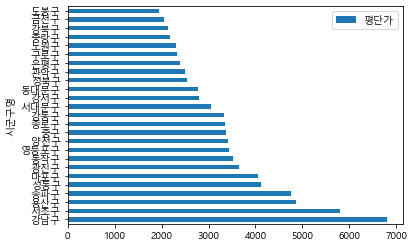

In [16]:
by_Area.pivot_table(values='평단가',index='시군구명',aggfunc='mean').sort_values(by='평단가',ascending=False).plot(kind='barh')
plt.show()

#### 시기별 평단가

In [17]:
by_Area.groupby(by='거래월')[['평단가']].mean()

,평단가
거래월,
1,2748.562065
2,2817.138239
3,2979.525275
4,3241.732960
5,3536.735214
6,3630.964430
7,3575.552240
8,3388.014232
9,3561.092415


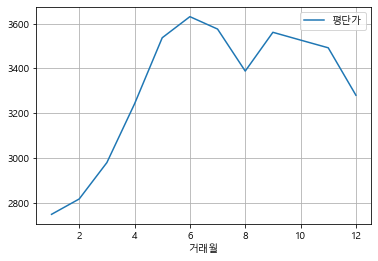

In [18]:
by_Area.groupby(by='거래월')[['평단가']].mean().plot(grid=True)
plt.show()

#### 층수별 평단가

In [19]:
#층수별 평단가
by_Area.pivot_table(values='평단가',index='층',aggfunc='mean')

,평단가
층,
-2,7590.500000
-1,3634.062500
1,3292.325491
2,3233.218211
3,3293.155058
...,...
61,5306.000000
62,6055.000000
65,4186.000000


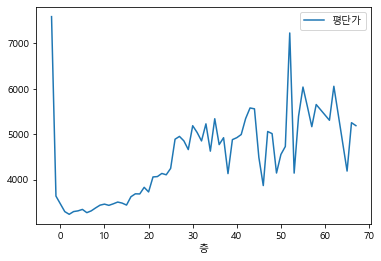

In [20]:
by_Area.pivot_table(values='평단가',index='층',aggfunc='mean').plot()
plt.show()

#### 건축년도별 평단가

In [21]:
#건축년도 평단가
by_Area.pivot_table(values='평단가',index='건축년도',aggfunc='mean').sort_values(by='평단가',ascending=False)

,평단가
건축년도,
1982,8608.279176
1978,6626.782609
1979,6493.484058
1980,6306.350000
1977,5684.760479
1983,5133.719745
1981,5127.502283
2016,4925.773562
1974,4911.378205


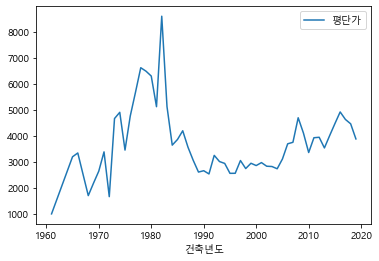

In [22]:
by_Area.pivot_table(values='평단가',index='건축년도',aggfunc='mean').plot()

#### 서울시 구별 월 평단가
- 각 구당 월 평단가가 제일 높은 날과, 적은날을 확인하여 비수기와 성수기의 거래가 차이를 가정 할 수 있다.

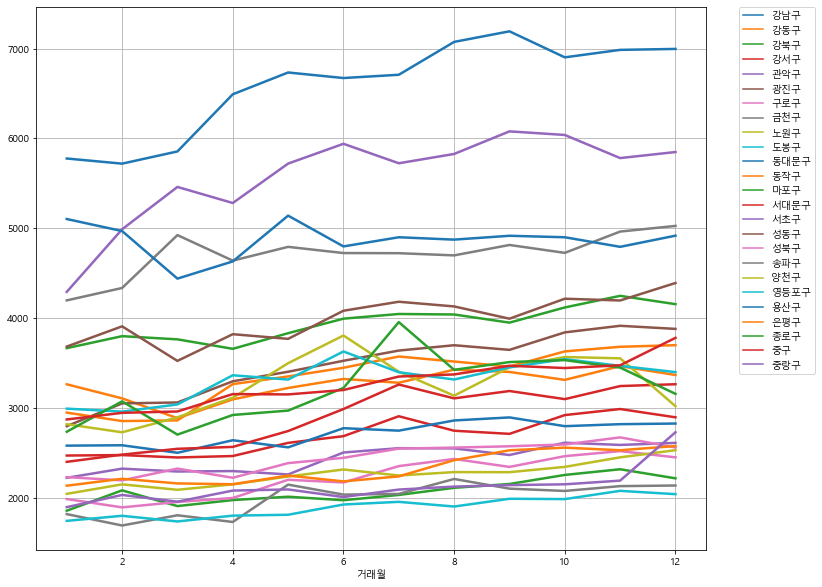

In [23]:
disMonth = by_Area.pivot_table(values='평단가',index='거래월',columns='시군구명',aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.lineplot(data=disMonth, palette="tab10", linewidth=2.5,dashes=False)
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #레이블 위치변경용
plt.show()

#### 구별 거래량이 제일 많은 면적의 가격 분포

In [79]:
sellcount = by_Area.pivot_table(values='거래일자',index=['시군구명',''],columns='전용면적(평)3',aggfunc='count').fillna(0).astype(int)
sellcount

전용면적(평)3,"(0, 5]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]","(5, 10]","(50, 55]","(55, 60]","(60, 65]","(65, 70]","(70, 75]","(75, 80]","(80, 85]"
시군구명,,,,,,,,,,,,,,,,,
강남구,22,424,639,1394,253,365,371,220,201,238,88,49,37,16,23,2,2
강동구,219,123,1084,1699,167,279,95,23,4,85,2,2,2,2,0,0,0
강북구,27,100,419,511,1,112,18,2,1,1,0,0,0,0,0,0,0
강서구,50,474,893,1299,83,132,153,15,24,190,8,2,0,0,0,0,0
관악구,76,115,803,737,48,227,28,10,0,80,4,0,0,0,0,0,0
광진구,38,37,453,788,37,32,71,62,64,5,19,6,0,9,0,0,0
구로구,65,351,1134,1333,49,189,76,8,16,71,11,1,0,0,0,0,0
금천구,18,162,465,535,61,114,24,5,1,47,0,0,0,0,0,0,0
노원구,112,2056,1944,1711,130,296,123,37,2,244,3,0,0,0,0,0,0


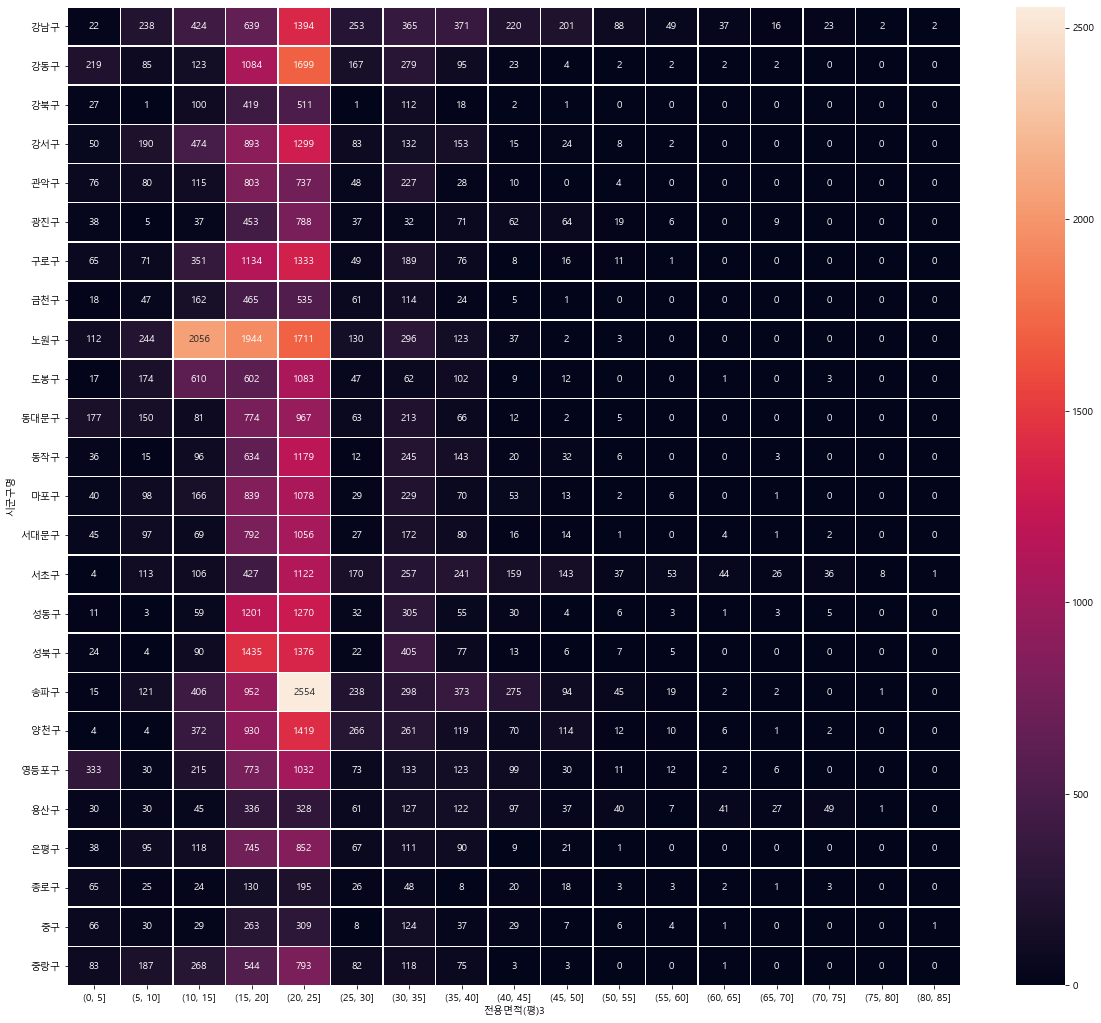

In [25]:
plt.figure(figsize=(20,18))
sns.heatmap(sellcount, annot=True, fmt="d", linewidths=.5)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,시군구명,평단가
10,1995,2019,1,4,명륜2가,73500,아남1,84.80,11110,2,4,25.65,25,"(20, 25]",종로구,2865
11,1995,2019,1,6,명륜2가,85000,아남1,84.90,11110,17,4,25.68,25,"(20, 25]",종로구,3309
32,2001,2019,1,23,평창동,57500,롯데낙천대,84.21,11110,5,72,25.47,25,"(20, 25]",종로구,2257
39,2002,2019,2,16,명륜1가,59500,아마레스,84.59,11110,4,45-5,25.59,25,"(20, 25]",종로구,2325
40,1995,2019,2,28,명륜2가,74800,아남1,84.90,11110,2,4,25.68,25,"(20, 25]",종로구,2912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68854,1998,2019,12,19,천호동,51700,성원아파트,83.15,11740,6,564,25.15,25,"(20, 25]",강동구,2055
68858,1985,2019,12,27,천호동,78000,우성,84.93,11740,1,19-1,25.69,25,"(20, 25]",강동구,3036
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",강동구,3118
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",강동구,3035


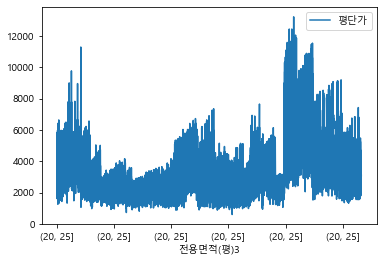

In [96]:
tmp.plot(x='전용면적(평)3',y='평단가')

### 거래량

#### 평수별 거래량

In [27]:
#평수별 거래량
fin.pivot_table(values='전용면적(평)',index='전용면적(평)3',aggfunc='count')

,전용면적(평)
전용면적(평)3,
"(0, 5]",1615
"(5, 10]",2137
"(10, 15]",6596
"(15, 20]",19211
"(20, 25]",26620
"(25, 30]",2052
"(30, 35]",4854
"(35, 40]",2740
"(40, 45]",1296


#### 평수별 거래비율

In [28]:
sell = ((fin.pivot_table(values='전용면적(평)',index='전용면적(평)3',aggfunc='count')/fin.count())*100)
sell[['전용면적(평)']]

,전용면적(평)
전용면적(평)3,
"(0, 5]",2.345202
"(5, 10]",3.103218
"(10, 15]",9.578299
"(15, 20]",27.897014
"(20, 25]",38.655901
"(25, 30]",2.979786
"(30, 35]",7.048676
"(35, 40]",3.978857
"(40, 45]",1.881970


#### 지역별 거래량

In [29]:
fin.groupby(by='시군구명')[['거래일자']].count()

,거래일자
시군구명,
강남구,4344
강동구,3786
강북구,1192
강서구,3323
관악구,2128
광진구,1621
구로구,3304
금천구,1432
노원구,6658


#### 지역별 거래비율

In [115]:
disp = ((fin.pivot_table(values='전용면적(평)',index='시군구명',aggfunc='count')/fin.count())*100)[['전용면적(평)']]
disp

,전용면적(평)
시군구명,
강남구,6.308086
강동구,5.497793
강북구,1.730948
강서구,4.825453
관악구,3.090149
광진구,2.353915
구로구,4.797862
금천구,2.079461
노원구,9.668332


#### 구별 거래비율, 그중 최고비율구에서는 거래된 평수의 비율이 어떤지

In [150]:
no = fin[fin['시군구명']=='노원구']

In [151]:
nop = ((no.pivot_table(values='전용면적(평)',index='전용면적(평)3',aggfunc='count'))/no.count()*100)[['전용면적(평)']]
nop

,전용면적(평)
전용면적(평)3,
"(0, 5]",1.682187
"(10, 15]",30.880144
"(15, 20]",29.197957
"(20, 25]",25.698408
"(25, 30]",1.952538
"(30, 35]",4.445780
"(35, 40]",1.847402
"(40, 45]",0.555722
"(45, 50]",0.030039


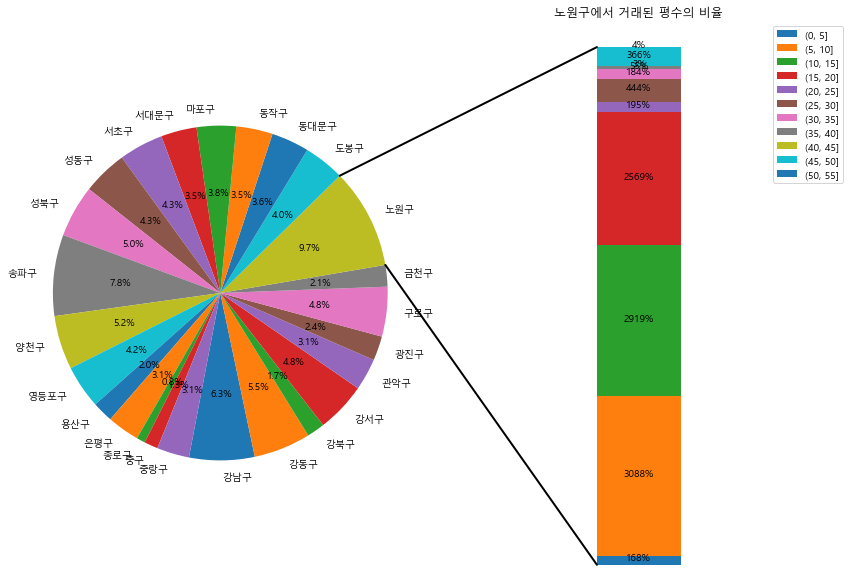

In [163]:
# make figure and assign axis objects
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[1]
ax1.pie(disp.loc[:,'전용면적(평)'], autopct='%1.1f%%', startangle=angle,
        labels=disp.index)

xpos = 0
width = .2
bottom = 0

for j in range(len(nop.loc[:,'전용면적(평)'])):
    height = nop.loc[:,'전용면적(평)'][j]
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('노원구에서 거래된 평수의 비율')
ax2.legend(sell.index)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[8].theta1, ax1.patches[8].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

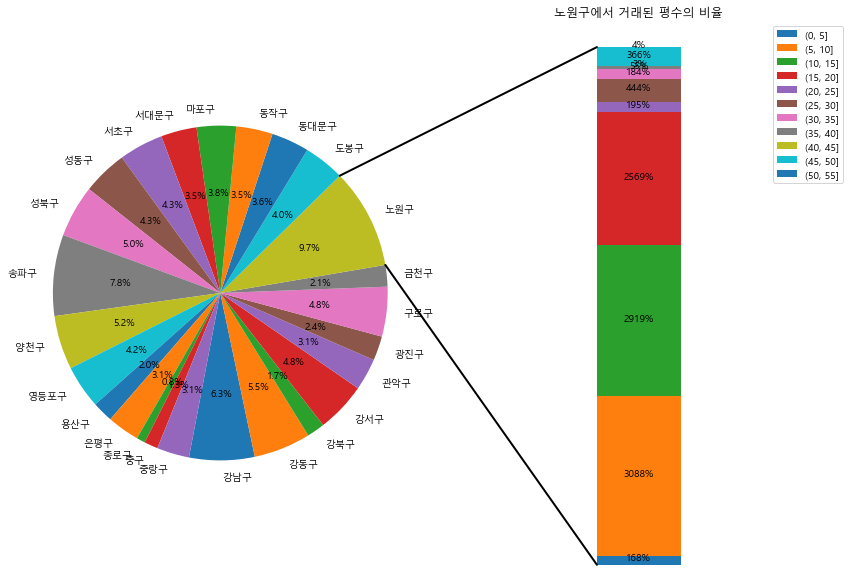

In [164]:
# make figure and assign axis objects
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[1]
ax1.pie(disp.loc[:,'전용면적(평)'], autopct='%1.1f%%', startangle=angle,
        labels=disp.index)

xpos = 0
width = .2
bottom = 0

for j in range(len(nop.loc[:,'전용면적(평)'])):
    height = nop.loc[:,'전용면적(평)'][j]
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('노원구에서 거래된 평수의 비율')
ax2.legend(sell.index)
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[8].theta1, ax1.patches[8].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

#### 건축년도별 거래량

In [31]:
fin.pivot_table(values='전용면적(평)',index='건축년도',aggfunc='count')

,전용면적(평)
건축년도,
1961,1
1965,1
1966,5
1968,16
1969,35
1970,41
1971,128
1972,27
1973,27


#### 건축년도별 거래비율

In [32]:
((fin.pivot_table(values='전용면적(평)',index='건축년도',aggfunc='count')/fin.count())*100)[['전용면적(평)']]

,전용면적(평)
건축년도,
1961,0.001452
1965,0.001452
1966,0.007261
1968,0.023234
1969,0.050825
1970,0.059538
1971,0.185874
1972,0.039208
1973,0.039208


## 5. 시각화
#### 시각화 그래프는 7개 이상 나와야 합니다.
    - 각각의 그래프마다 분석에 있어서 세웠던 전략과 시각화 목적을 간단한 코멘트를 달아주세요
#### 수업시간에 언급하지 않은 새로운 패턴의 그래프는 3개 이상 사용하시기 바랍니다.
    - 그래프에 대한 간단한 설명과 함께 코멘트로 직접 달아주세요

#### 작업시간은 오후 3시까지 생각하고 있습니다.
    - 최종 발표시간은 4시입니다.